In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import r2_score, mean_squared_error

## Filter Based Methods
### Mutual Information

In [3]:
dataset = fetch_california_housing()
print(dataset.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [4]:
print(dataset.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])


In [5]:
x = dataset['data']
y = dataset['target']
feature_names = dataset['feature_names']

In [7]:
x.shape

(20640, 8)

In [33]:
from sklearn.feature_selection import mutual_info_regression, SelectPercentile, SelectKBest
x_new = SelectKBest(mutual_info_regression, k=6).fit_transform(x, y)
print(x_new.shape)

(20640, 6)


In [34]:
x_train, x_test, y_train, y_test = train_test_split(x_new, y, test_size=0.2)

In [35]:
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(r2_score(y_test, y_pred))

0.6065890416280406


### Pearson Correlation
**Two ways of usage**

- a. Analyse the relationship between 'each' individual feature (input) and output

In [62]:
x = dataset['data']
y = dataset['target']
feature_names = dataset['feature_names']
print(x.shape)

(20640, 8)


In [63]:
from sklearn.feature_selection import f_regression, SelectKBest
x_new = SelectKBest(f_regression, k=6).fit_transform(x, y)
print(x_new.shape)

(20640, 6)


In [64]:
x_train, x_test, y_train, y_test = train_test_split(x_new, y, test_size=0.2)
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(r2_score(y_test, y_pred))

0.6195791849179136


b. Analyses relationship b/w the features themselves
- Core Idea: Drop features which are highly correlated (dealing only on the input side)

In [66]:
import pandas as pd
x = dataset['data']
y = dataset['target']
feature_names = dataset['feature_names']
x_pd = pd.DataFrame(x, columns=feature_names)
x_pd.head(10)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
5,4.0368,52.0,4.761658,1.103627,413.0,2.139896,37.85,-122.25
6,3.6591,52.0,4.931907,0.951362,1094.0,2.128405,37.84,-122.25
7,3.1200,52.0,4.797527,1.061824,1157.0,1.788253,37.84,-122.25
8,2.0804,42.0,4.294118,1.117647,1206.0,2.026891,37.84,-122.26
9,3.6912,52.0,4.970588,0.990196,1551.0,2.172269,37.84,-122.25


In [67]:
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html
# Pearson (linear reln), Kendall (non-linear), Spearman (non-linear)
x_pd.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000


<Axes: >

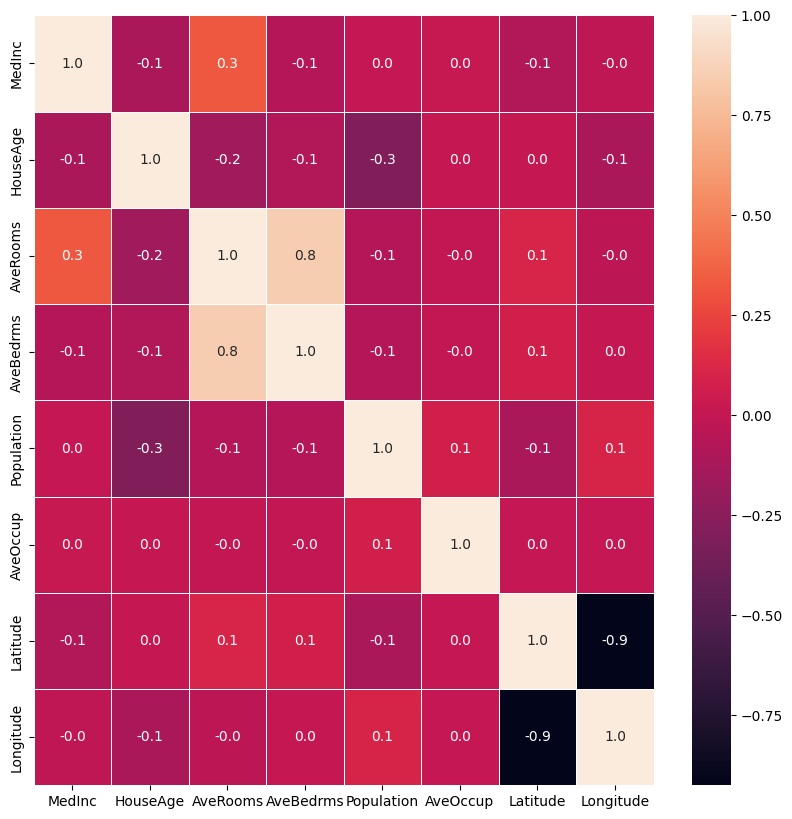

In [68]:
import seaborn as sns
#correlation map
f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(x_pd.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

In [69]:
x_new = x_pd.drop(['AveBedrms', 'Longitude'], axis=1)
x_new.head()

,MedInc,HouseAge,AveRooms,Population,AveOccup,Latitude
0,8.3252,41.0,6.984127,322.0,2.555556,37.88
1,8.3014,21.0,6.238137,2401.0,2.109842,37.86
2,7.2574,52.0,8.288136,496.0,2.802260,37.85
3,5.6431,52.0,5.817352,558.0,2.547945,37.85
4,3.8462,52.0,6.281853,565.0,2.181467,37.85


In [70]:
x_train, x_test, y_train, y_test = train_test_split(x_new, y, test_size=0.2)
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(r2_score(y_test, y_pred))

0.5186780839752869


## Wrapper Based Methods
### Recurive Feature Elimination (RFE)

In [72]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import Lasso

# Regression
X = dataset['data']
y = dataset['target']
feature_names = dataset['feature_names']

estimator = Lasso()
selector = RFE(estimator, n_features_to_select=6, step=1).fit(X, y)
print(selector.ranking_, )

[1 1 3 2 1 1 1 1]


In [73]:
X_new = selector.transform(X)
print(X_new.shape)

(20640, 6)


In [74]:
x_train, x_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2)
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(r2_score(y_test, y_pred))

0.6018295949740485


### Select from Model

In [75]:
# Using estimators that assign weights to the features
from sklearn.feature_selection import SelectFromModel

X = dataset['data']
y = dataset['target']
feature_names = dataset['feature_names']

In [78]:
from sklearn.svm import LinearSVR
lsvr = LinearSVR().fit(X, y)
model = SelectFromModel(lsvr, prefit=True)

C:\Users\Pallavi.Saxena\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\Pallavi.Saxena\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [79]:
X_new = model.transform(X)
X_new.shape

(20640, 3)

### Sequential Feature Selection

In [80]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import RidgeCV

# Regression
X = dataset['data']
y = dataset['target']
feature_names = dataset['feature_names']
ridge = RidgeCV().fit(X, y)

In [81]:
sfs_forward = SequentialFeatureSelector(
    ridge, n_features_to_select="auto", direction="forward"
).fit(X, y)

print(sfs_forward)

SequentialFeatureSelector(estimator=RidgeCV())


In [82]:
X_new = sfs_forward.transform(X)
X_new.shape

(20640, 4)

In [83]:
## Important: You can now use any model with these newly selected features
x_train, x_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2)
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(r2_score(y_test, y_pred))

0.5557961681116267


## PCA

In [95]:
x = dataset['data']
y = dataset['target']
feature_names = dataset['feature_names']

print(x.shape)

(20640, 8)


In [97]:
from sklearn.decomposition import PCA
X_new = PCA(n_components=7, svd_solver='full').fit_transform(x)
print(X_new.shape)

(20640, 7)


In [98]:
x_train, x_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2)
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(r2_score(y_test, y_pred))

0.6038247389045385
